In [1]:
species = ['./Arabidopsis_thaliana.TAIR10.52.gtf', './augustus.hints.gtf', './Oryza_sativa.IRGSP-1.0.52.gtf']

In [2]:
!cat ./Arabidopsis_thaliana.TAIR10.52.gtf | grep -v "#" | wc -l
!cat ./Oryza_sativa.IRGSP-1.0.52.gtf | grep -v "#" | wc -l
!cat ./augustus.hints.gtf | grep -v "#" | wc -l

888095
617115
866971


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
with open(species[1], 'r', encoding='utf-8') as f:
    gtf = {'gene':[], 'transcript':[], 'exon':[], 'intron':[], 'stop_codon':[], 'start_codon':[], 'CDS':[]}
    for line in tqdm(f.readlines()):
        line = line.strip().split('\t')
        if line[0][0] == '#': continue
        for t in gtf.keys():
            if line[2] == str(t):
                gtf[t].append(line)
                
print(len(gtf['gene']))

100%|███████████████████████████████████████████████████████████████████████| 866971/866971 [00:02<00:00, 385531.37it/s]

47773


In [5]:
# palette = sns.color_palette('YlOrBr')
# palette = sns.color_palette('Greens')
palette = sns.color_palette('Purples')

{'gene': 47773, 'transcript': 48987, 'exon': 240410, 'intron': 191450, 'stop_codon': 48972, 'start_codon': 48969, 'CDS': 240410}


<AxesSubplot:title={'center':'Numbers of Genetic Components : Vioal sp.'}, xlabel='Type', ylabel='Number'>

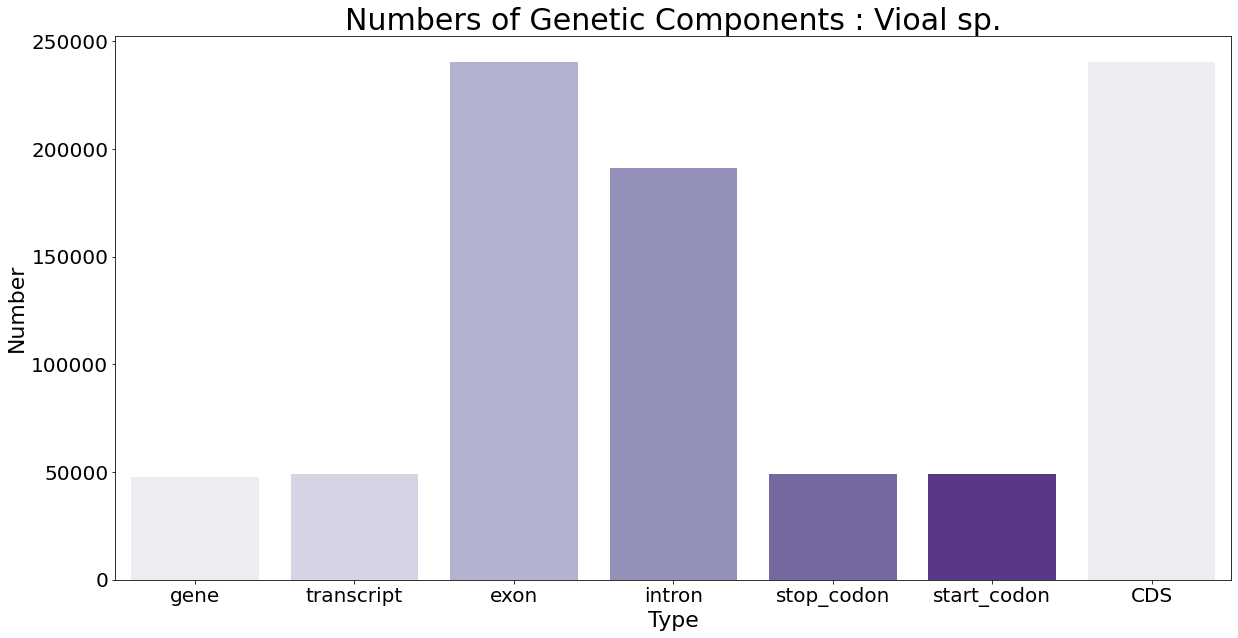

In [6]:
gtf_num = {}
for key in gtf.keys():
    gtf_num[str(key)] = len(gtf[key])
    
print(gtf_num)
gtf_num_df = pd.DataFrame(columns=['Type', 'Number'])
gtf_num_df['Type'] = gtf_num.keys()
gtf_num_df['Number'] = gtf_num.values()
gtf_num_df
fig, axes = plt.subplots(figsize=(20, 10))

# axes.set_title('Numbers of Genetic Components : Oryza sativa ssp. japonica')
# axes.set_title('Numbers of Genetic Components : Arabidopsis thaliana')
axes.set_title('Numbers of Genetic Components : Vioal sp.')

for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(20)

axes.set_xlabel('Type')
axes.set_ylabel('Numbers')

axes.title.set_size(30)
axes.xaxis.label.set_size(22)
axes.yaxis.label.set_size(22)

sns.barplot(x = 'Type', y='Number', data=gtf_num_df, palette=palette)

- Todo : Protein Coding Genes, Alternatively spliced genes, Gene density(Kb/gene), Avg exons per gene, Avg exon length

In [4]:
gdf = {'contig' : [], 'Type' : [], 'start' : [], 'stop' : []}

with open(species[1], 'r', encoding='utf-8') as f:
    for line in tqdm(f.readlines()):
        line = line.strip().split('\t')
        gdf['contig'].append(line[0])
        gdf['Type'].append(line[2])
        gdf['start'].append(line[3])
        gdf['stop'].append(line[4])

gdf = pd.DataFrame(gdf)
gdf

100%|████████████████████████████████████████████████████| 866971/866971 [00:00<00:00, 1191741.68it/s]


,contig,Type,start,stop
0,ctg000630,gene,9864,10383
1,ctg000630,transcript,9864,10383
2,ctg000630,stop_codon,9864,9866
3,ctg000630,CDS,9864,10017
4,ctg000630,exon,9864,10017
...,...,...,...,...
866966,ctg000600,transcript,7933730,7934119
866967,ctg000600,start_codon,7933730,7933732
866968,ctg000600,CDS,7933730,7934119
866969,ctg000600,exon,7933730,7934119


In [23]:
# Avg. genes per contig
print(len(gdf[gdf['Type'] == 'gene']) / len(list(set(gdf['contig']))))

379.1507936507937


In [39]:
gdf_g = gdf[gdf['Type'] == 'gene']
gdf_g = gdf_g.reset_index()
gdf_g.drop(['index'], axis=1, inplace=True)
gdf_g

,contig,Type,start,stop
0,ctg000630,gene,9864,10383
1,ctg000630,gene,20870,22250
2,ctg000630,gene,48992,49940
3,ctg000630,gene,50765,54348
4,ctg000630,gene,83007,84375
...,...,...,...,...
47768,ctg000600,gene,7841659,7842261
47769,ctg000600,gene,7868839,7869555
47770,ctg000600,gene,7929309,7932077
47771,ctg000600,gene,7932158,7933039


In [41]:
gdf_d = {}
for contig in list(set(gdf['contig'])):
    gdf_d[contig] = len(gdf_g[gdf_g['contig'] == contig])

In [43]:
# maximum genes per contig
max(gdf_d.values())

3287